In [20]:
import numpy as np
import lightcone_FRB_decreasingz_xlos as lc
import os
import DM
import h5py
import matplotlib.pyplot as pl
import matplotlib as mpl
cmap2 = mpl.colors.ListedColormap(['k', 'yellow'])
cmap3 = mpl.colors.ListedColormap(['k', 'white'])
pl.rcParams["font.family"] = "Times New Roman"
pl.rcParams['ytick.labelsize']=24
pl.rcParams['xtick.labelsize']=24
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [112]:
#constants
pc = 3.08*10**16 #in terms of m
cm2m = 0.01 #cm to m

In [44]:
HII_DIM = 200
DIM = 800
z_start = 6.6
z_end = 6.0
nboxes = 4
N = 250
lightcone_sharpcutoff = 20

In [165]:
#Do the lightcone for post EoR. In this case no ionization field is needed
postEoR_boxes = '/Users/michael/Research/FRB/Simulation_Boxes/PostEoR_densityfield/Default_Res/'
z_starts_postEoR = np.linspace(6.0, 0.2, 30)
print(z_starts_postEoR)
z_end_postEoR = 0.0
nboxes_postEoR = 31

#make lightcone for each redshift, beta and slice
density_lightcones_z_Dictionary_postEoR = np.zeros((len(z_starts_postEoR)), dtype = object)
lightcone_redshifts_z_Dictionary_postEoR = np.zeros((len(z_starts_postEoR)), dtype = object)


for z in range(len(z_starts_postEoR)):
    print('Doing z ' + str(z_starts_postEoR[z]))
    
    #make the lightcone for each quantity
    densitylightcone_Dictionary_postEoR = {}
    
    #if we wanted to change this to be the entire box, then change pixelsperslab to HII_DIM
    #and change the density method to slab = False
    for i in range(1):
        box_slice = HII_DIM - i -1
        densitylightcone_Dictionary_postEoR[int(box_slice)], lightcone_redshifts = lc.lightcone(DIM = HII_DIM, z_start = np.round(z_starts_postEoR[z],1), z_end = z_end_postEoR, N = N, nboxes = nboxes_postEoR - int(z), box_slice = int(box_slice), directory = postEoR_boxes , marker = 'updated_smoothed_deltax', return_redshifts = True)
        
        lightcone_redshifts_z_Dictionary_postEoR[z] = lightcone_redshifts
        density_lightcones_z_Dictionary_postEoR[z] = densitylightcone_Dictionary_postEoR
        
    print('Done this redshift')
            


[6.  5.8 5.6 5.4 5.2 5.  4.8 4.6 4.4 4.2 4.  3.8 3.6 3.4 3.2 3.  2.8 2.6
 2.4 2.2 2.  1.8 1.6 1.4 1.2 1.  0.8 0.6 0.4 0.2]
Doing z 6.0
Done this redshift
Doing z 5.8
Done this redshift
Doing z 5.6
Done this redshift
Doing z 5.4
Done this redshift
Doing z 5.2
Done this redshift
Doing z 5.0
Done this redshift
Doing z 4.8
Done this redshift
Doing z 4.6
Done this redshift
Doing z 4.4
Done this redshift
Doing z 4.2
Done this redshift
Doing z 4.0
Done this redshift
Doing z 3.8000000000000003
Done this redshift
Doing z 3.6
Done this redshift
Doing z 3.4000000000000004
Done this redshift
Doing z 3.2
Done this redshift
Doing z 3.0000000000000004
Done this redshift
Doing z 2.8000000000000003
Done this redshift
Doing z 2.6
Done this redshift
Doing z 2.4000000000000004
Done this redshift
Doing z 2.2
Done this redshift
Doing z 2.0000000000000004
Done this redshift
Doing z 1.8000000000000007
Done this redshift
Doing z 1.6000000000000005
Done this redshift
Doing z 1.4000000000000004
Done this redshif

In [187]:
#compute the DM for the postEoR density field that slice along the line of sight

slice_of_box = 199
DM_field_postEoR = np.zeros((len(z_starts_postEoR), len(betas), HII_DIM, HII_DIM))

x, y = 10, 10

for z in range(len(z_starts_postEoR)):
    print('doing ' + str(z))
    for b in range(len(betas)):
        #for x in range(HII_DIM):
         #   for y in range(HII_DIM):
        DM_field_postEoR[z][b][x][y] = DM.compute_DM(x,y, np.zeros_like(density_lightcones_z_Dictionary_postEoR[z][slice_of_box]), density_lightcones_z_Dictionary_postEoR[z][slice_of_box], lightcone_redshifts_z_Dictionary_postEoR[z])



doing 0
doing 1
doing 2
doing 3
doing 4
doing 5
doing 6
doing 7
doing 8
doing 9
doing 10
doing 11
doing 12
doing 13
doing 14
doing 15
doing 16
doing 17
doing 18
doing 19
doing 20
doing 21
doing 22
doing 23
doing 24
doing 25
doing 26
doing 27
doing 28
doing 29


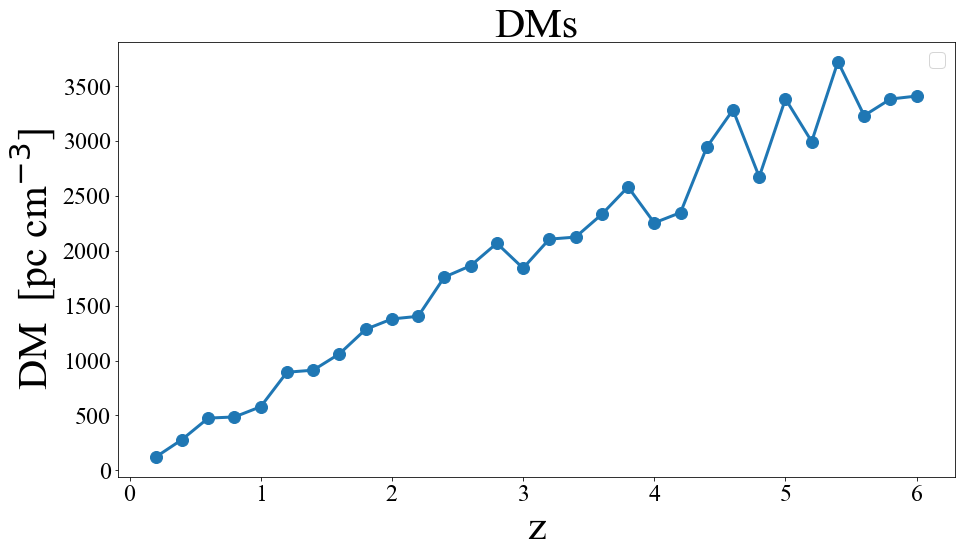

In [189]:
#plot
pl.figure(figsize = (15,8))
pl.plot(np.round(z_starts_postEoR,1), (0.01**3)*DM_field_postEoR[:,1,10,10]/(pc),  marker = 'o',markersize = 12, linewidth=3., )
pl.title(r'DMs', fontsize = 42)
pl.legend(prop={'size': 20})
#pl.gca().invert_yaxis()
#pl.gca().invert_xaxis()
pl.xlabel(r'z', fontsize = 42)
pl.ylabel(r'DM  [pc cm$^{-3}$]',  fontsize = 42)
pl.xticks(fontsize=24)
pl.yticks(fontsize=24)
pl.show()
pl.close()

In [41]:
#directory to get the ionization boxes (for lightcone and ionization fied and density field)
io_boxes ='/Users/michael/Research/LAE_Clustering/Simulation_Boxes/MturnHaloes5e8_zeta25_MturnxHII5e8_beta1_fullEoR_Seed200_xLos_noHalos/'
oi_boxes = '/Users/michael/Research/LAE_Clustering/Simulation_Boxes/MturnHaloes5e8_zeta25_MturnxHII5e8_beta-1_fullEoR_Seed200_xLos/'

ionization_boxes = (io_boxes, oi_boxes)
density_boxes = '/Users/michael/Research/LAE_Clustering/Simulation_Boxes/MturnHaloes5e8_zeta25_MturnxHII5e8_beta1_fullEoR_Seed200_xLos/'


In [153]:
betas = (1, -1)
z_starts = np.linspace(8.6, 6.6, 11)
#z_starts = np.linspace(6.6, 6.0, 4)
z_end = 6.0
nboxes = 14
density_z_beta = np.zeros((len(z_starts), len(betas)))


In [154]:
#make lightcone for each redshift, beta and slice

ionization_lightcones_beta_z_Dictionary = np.zeros((len(z_starts) , len(betas)) , dtype = object)
density_lightcones_beta_z_Dictionary = np.zeros((len(z_starts) , len(betas)) , dtype = object)
lightcone_redshifts_beta_z_Dictionary = np.zeros((len(z_starts) , len(betas)) , dtype = object)


for z in range(len(z_starts)):
    print('Doing z ' + str(z_starts[z]))

    
    for b in range(len(betas)):
        print('doing beta ' + str(betas[b]) )
        
        #make the lightcone for each quantity
        lightcone_Dictionary = {}
        densitylightcone_Dictionary = {}
        
        #if we wanted to change this to be the entire box, then change pixelsperslab to HII_DIM
        #and change the density method to slab = False
        for i in range(1):
            box_slice = HII_DIM - i -1
            lightcone_Dictionary[int(box_slice)] , lightcone_redshifts = lc.lightcone(DIM = HII_DIM, z_start = z_starts[z], z_end = z_end, N = N, nboxes = nboxes - int(z), box_slice = int(box_slice), directory =  ionization_boxes[b], return_redshifts = True )
            densitylightcone_Dictionary[int(box_slice)] = lc.lightcone(DIM = HII_DIM, z_start = z_starts[z], z_end = z_end, N = N, nboxes = nboxes - int(z), box_slice = int(box_slice), directory = density_boxes , marker = 'updated_smoothed_deltax')
            
    
        ionization_lightcones_beta_z_Dictionary[z][b] = lightcone_Dictionary
        lightcone_redshifts_beta_z_Dictionary[z][b] = lightcone_redshifts
        density_lightcones_beta_z_Dictionary[z][b] = densitylightcone_Dictionary
        
    print('Done this redshift')
            


Doing z 8.6
doing beta 1
doing beta -1
Done this redshift
Doing z 8.4
doing beta 1
doing beta -1
Done this redshift
Doing z 8.2
doing beta 1
doing beta -1
Done this redshift
Doing z 8.0
doing beta 1
doing beta -1
Done this redshift
Doing z 7.8
doing beta 1
doing beta -1
Done this redshift
Doing z 7.6
doing beta 1
doing beta -1
Done this redshift
Doing z 7.3999999999999995
doing beta 1
doing beta -1
Done this redshift
Doing z 7.199999999999999
doing beta 1
doing beta -1
Done this redshift
Doing z 7.0
doing beta 1
doing beta -1
Done this redshift
Doing z 6.8
doing beta 1
doing beta -1
Done this redshift
Doing z 6.6
doing beta 1
doing beta -1
Done this redshift


In [185]:
#compute the DM for that slice along the line of sight

slice_of_box = 199
DM_field = np.zeros((len(z_starts), len(betas), HII_DIM, HII_DIM))

x, y = 25, 25

for z in range(len(z_starts)):
    print('doing ' + str(z))
    for b in range(len(betas)):
        #for x in range(HII_DIM):
         #   for y in range(HII_DIM):
        DM_field[z][b][x][y] = DM.compute_DM(x,y, ionization_lightcones_beta_z_Dictionary[z][b][slice_of_box], density_lightcones_beta_z_Dictionary[z][b][slice_of_box], lightcone_redshifts_beta_z_Dictionary[z][b])



doing 0
doing 1
doing 2
doing 3
doing 4
doing 5
doing 6
doing 7
doing 8
doing 9
doing 10


In [192]:
#average out the DM field

DM_field_avg = np.sum(np.sum(DM_field, axis = 2), axis = 2)



(11, 2)


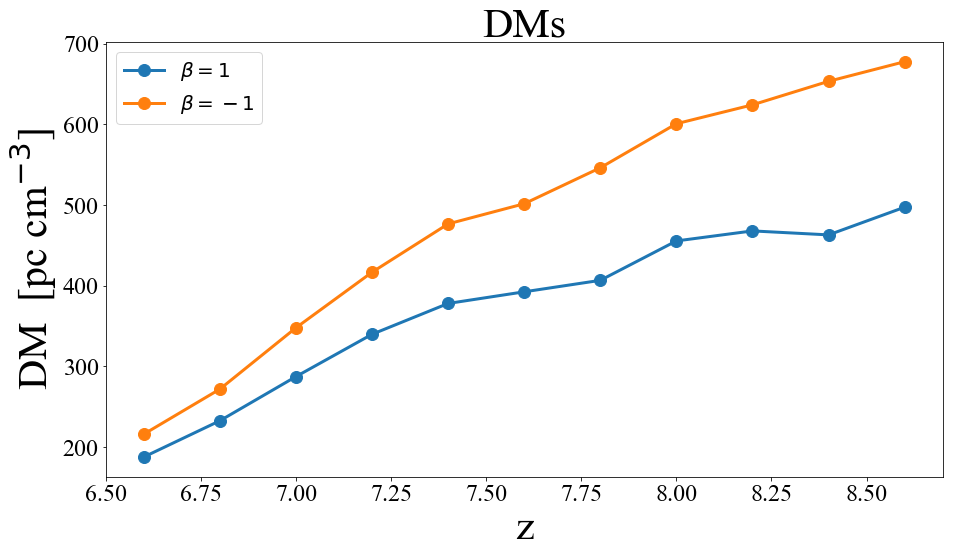

In [194]:
#plot

pl.figure(figsize = (15,8))
for b in range(len(betas)):
    pl.plot(np.round(z_starts,1), (0.01**3)*DM_field_avg[:,b]/(pc),  marker = 'o',markersize = 12, linewidth=3., label = r'$\beta = {}$' .format(betas[b]))

pl.title(r'DMs', fontsize = 42)
pl.legend(prop={'size': 20})
#pl.gca().invert_yaxis()
#pl.gca().invert_xaxis()
pl.xlabel(r'z', fontsize = 42)
pl.ylabel(r'DM  [pc cm$^{-3}$]',  fontsize = 42)
pl.xticks(fontsize=24)
pl.yticks(fontsize=24)
pl.show()
pl.close()

In [ ]:
#I guess the speed at which it continues going up will give a clue to how fast EoR is unfolding at the end 
#check the max DM fluctuation after EoR, and put upper limit constraints

#we'll have to average these results somehow (across different line of sights)

#we're basically just looking to do inference on DM distributions


#ask Webin, what errors bars to assume for a potential forcast like that?

#Need to get the probability distribution at each z. Is this the sigma^2 that everybody else did?

#think about how this method is advantageous over 21cm or ly a an